In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from scipy.stats import chi2_contingency


category:AME_CONTRACT_TYPE: This likely refers to the type of contract the applicant has with the institution, such as "Cash loans" or "Revolving loans."

CODE_GENDER: This indicates the gender of the applicant, typically represented as "M" for male and "F" for female.

FLAG_OWN_CAR: A flag indicating whether the applicant owns a car. Commonly represented as "Y" for yes and "N" for no.

FLAG_OWN_REALTY: A flag indicating whether the applicant owns real estate property. Commonly represented as "Y" for yes and "N" for no.

NAME_TYPE_SUITE: This specifies the type of suite the applicant lives in, which could include categories like "Unaccompanied", "Family", "Spouse, partner", "Children", etc.

NAME_INCOME_TYPE: This denotes the type of income the applicant has, such as "Working", "State servant", "Commercial associate", "Pensioner", "Unemployed", "Student", "Businessman", etc.

NAME_EDUCATION_TYPE: This represents the applicant's level of education, such as "Secondary / secondary special", "Higher education", "Incomplete higher", "Lower secondary", "Academic degree", etc.

NAME_FAMILY_STATUS: This indicates the marital status of the applicant, including categories like "Single / not married", "Married", "Civil marriage", "Widow", "Separated", "Divorced", etc.

NAME_HOUSING_TYPE: This specifies the type of housing the applicant resides in, such as "Rented apartment", "House / apartment", "Municipal apartment", "With parents", "Co-op apartment", "Office apartment", etc.

OCCUPATION_TYPE: This refers to the type of occupation the applicant has, such as "Laborers", "Core staff", "Managers", "Drivers", "Sales staff", "Accountants", "Cleaning staff", "Cooking staff", "HR staff", etc.

WEEKDAY_APPR_PROCESS_START: This indicates the day of the week when the application process was started, such as "Monday", "Tuesday", etc.

ORGANIZATION_TYPE: This describes the type of organization where the applicant is employed, like "Business Entity Type 3", "School", "Government", "Medicine", "Security Ministries", etc.

FONDKAPREMONT_MODE: This might refer to the mode of funding for major repairs, though the exact meaning can depend on the context provided by the dataset.

HOUSETYPE_MODE: This specifies the type of house the applicant lives in, such as "Block of flats", "Specific housing", or "Terraced house".

WALLSMATERIAL_MODE: This indicates the material of the walls of the applicant's house, like "Panel", "Stone, brick", "Wooden", "Mixed", "Monolithic", "Block", "Others".

EMERGENCYSTATE_MODE: This could refer to whether the applicant is in an emergency state, such as "Yes" or "No". The specific context will clarify its use.

K_ID_CURR: This is a unique identifier for each applicant. It is used to distinguish between different records in the dataset.

TARGET: This is the target variable indicating whether the applicant defaulted on the loan. Typically, it can be binary with "1" indicating default and "0" indicating non-default.

CNT_CHILDREN: This denotes the number of children the applicant has. It is an integer value representing the count of dependents under the age of 18.

AMT_INCOME_TOTAL: This is the total income of the applicant. It is a numeric value representing the annual income in the currency used by the institution.

AMT_CREDIT: This represents the total amount of credit the applicant has applied for. It is a numeric value denoting the loan amount requested.

AMT_ANNUITY: This indicates the annuity amount the applicant is supposed to pay for the loan. It is the periodic payment amount, usually calculated annually.

AMT_GOODS_PRICE: This is the price of the goods or services for which the loan is applied. It is a numeric value representing the cost of the item being financed.

REGION_POPULATION_RELATIVE: This indicates the relative population of the region where the applicant lives. It is a numeric value representing the proportion of the population in that region compared to the total population, often expressed as a fraction or percentage.

DAYS_BIRTH: This represents the age of the applicant in days at the time of application. It is a negative value, as it is calculated as the difference from the current date to the birth date.

DAYS_EMPLOYED: This denotes the total number of days the applicant has been employed. It is typically a negative value, representing the difference from the current date to the start date of employment. In some datasets, anomalies like extremely high positive values might be used to indicate unemployment or special cases.

AMT_REQ_CREDIT_BUREAU_HOUR:

This represents the number of credit bureau inquiries about the applicant within the last hour prior to the application. It is a numeric value indicating how many times the applicant's credit report was requested by various entities within this short time frame.
AMT_REQ_CREDIT_BUREAU_DAY:

This indicates the number of credit bureau inquiries about the applicant within the last day. It provides a count of how many times the applicant's credit information was checked within the past 24 hours.
AMT_REQ_CREDIT_BUREAU_WEEK:

This shows the number of credit bureau inquiries about the applicant within the last week. It is a numeric value reflecting the frequency of credit checks in the past seven days.
AMT_REQ_CREDIT_BUREAU_MON:

This column represents the number of credit bureau inquiries about the applicant within the last month. It indicates how often the applicant's credit report was requested in the past 30 days.
AMT_REQ_CREDIT_BUREAU_QRT:

This indicates the number of credit bureau inquiries about the applicant within the last quarter (three months). It is a count of credit report requests in the past 90 days.
AMT_REQ_CREDIT_BUREAU_YEAR:

This represents the number of credit bureau inquiries about the applicant within the last year. It shows how many times the applicant's credit report was checked over the past 12 months.

In [28]:
data=pd.read_csv('application_train.csv', encoding='latin-1')
data1 = data.sample(200)

In [29]:
data1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
117388,236128,0,Cash loans,F,N,Y,0,103500.0,118512.0,8050.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0
98767,214683,1,Cash loans,F,N,Y,0,94500.0,277969.5,9981.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,7.0
64116,174348,0,Cash loans,M,Y,Y,0,225000.0,640080.0,29970.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
162181,288024,1,Cash loans,M,N,Y,0,180000.0,592560.0,35937.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
235304,372557,0,Cash loans,M,N,Y,1,135000.0,436032.0,21208.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [30]:
 data1.shape

(200, 122)

In [31]:
data1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [32]:
data1['TARGET'].value_counts()

0    184
1     16
Name: TARGET, dtype: int64

<Axes: ylabel='Frequency'>

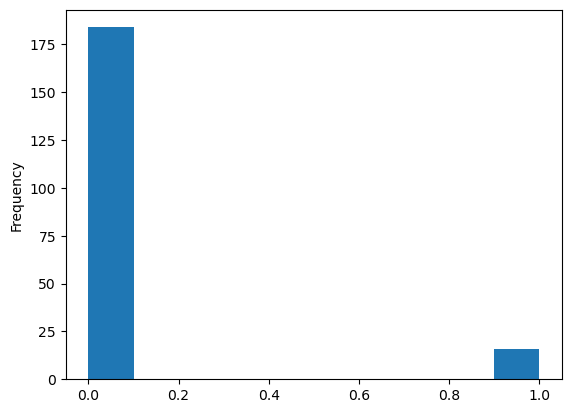

In [33]:
#We see many traning examples belong 0 (no) and less to 1(yes). Lets visualize it too.


data1["TARGET"].plot.hist()


In [34]:
data1.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [35]:
print(data1.dtypes == 'object')

SK_ID_CURR                    False
TARGET                        False
NAME_CONTRACT_TYPE             True
CODE_GENDER                    True
FLAG_OWN_CAR                   True
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     False
AMT_REQ_CREDIT_BUREAU_WEEK    False
AMT_REQ_CREDIT_BUREAU_MON     False
AMT_REQ_CREDIT_BUREAU_QRT     False
AMT_REQ_CREDIT_BUREAU_YEAR    False
Length: 122, dtype: bool


In [36]:
data1.isnull()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
117388,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
98767,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64116,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
162181,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
235304,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213447,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
277496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
225816,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
271701,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True


In [37]:
data1.isnull().sum().sort_values(ascending=False)

COMMONAREA_MODE             145
COMMONAREA_AVG              145
COMMONAREA_MEDI             145
NONLIVINGAPARTMENTS_MODE    143
NONLIVINGAPARTMENTS_AVG     143
                           ... 
NAME_FAMILY_STATUS            0
NAME_EDUCATION_TYPE           0
NAME_INCOME_TYPE              0
AMT_GOODS_PRICE               0
SK_ID_CURR                    0
Length: 122, dtype: int64

In [38]:
def missing_values_table(data1):
    missing_val= data.isnull().sum()

    # Percentage of missing values

    missing_per = 100 *data1.isnull().sum() /len(data1)

    mis_values_table = pd.concat([missing_val,missing_per],axis=1)

    missing_val_table_columns = mis_values_table.rename(columns={0 : 'Missing Values', 1 : '% of Missing Values'})

    missing_val_table_columns = missing_val_table_columns[
            missing_val_table_columns.iloc[:,1] != 0].sort_values(
        '% of Missing Values', ascending=False).round(1)

    return missing_val_table_columns

In [39]:
missing_values_table(data1)

,Missing Values,% of Missing Values
COMMONAREA_MEDI,214865,72.5
COMMONAREA_MODE,214865,72.5
COMMONAREA_AVG,214865,72.5
NONLIVINGAPARTMENTS_MEDI,213514,71.5
NONLIVINGAPARTMENTS_MODE,213514,71.5
...,...,...
DEF_60_CNT_SOCIAL_CIRCLE,1021,0.5
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.5
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.5
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.5


In [40]:
missing_values= missing_values_table(data1)

In [41]:
missing_values

,Missing Values,% of Missing Values
COMMONAREA_MEDI,214865,72.5
COMMONAREA_MODE,214865,72.5
COMMONAREA_AVG,214865,72.5
NONLIVINGAPARTMENTS_MEDI,213514,71.5
NONLIVINGAPARTMENTS_MODE,213514,71.5
...,...,...
DEF_60_CNT_SOCIAL_CIRCLE,1021,0.5
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.5
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.5
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.5


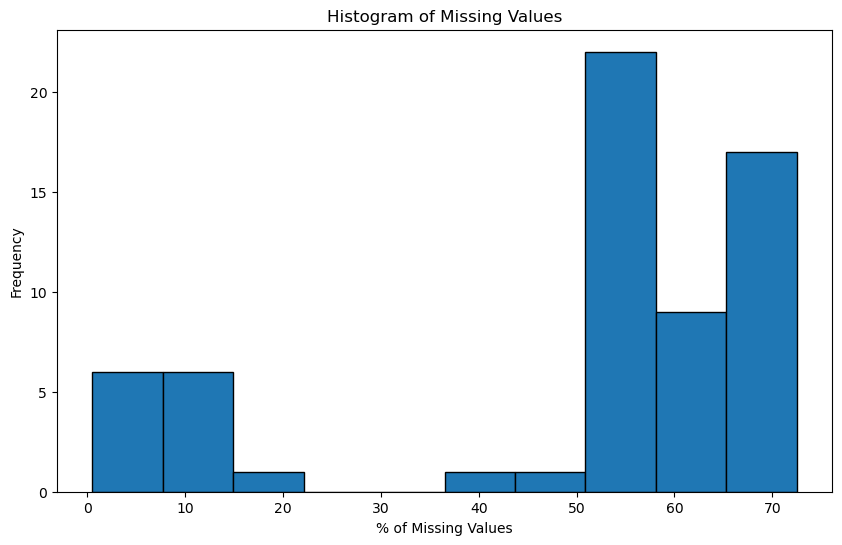

In [42]:
#Plotting histogram
plt.figure(figsize=(10, 6))
plt.hist(missing_values['% of Missing Values'], bins=10, edgecolor='black')
plt.xlabel('% of Missing Values')
plt.ylabel('Frequency')
plt.title('Histogram of Missing Values')
plt.show()

In [45]:
df=data1

In [46]:
df.shape

(200, 122)

In [47]:
missing_values= missing_values_table(data)

In [48]:
missing_values_table(data).head(40)

,Missing Values,% of Missing Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [49]:
missing_values_table(data).head(30)

,Missing Values,% of Missing Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [50]:
def handle_missing_values(data):
    """
    Handles missing values in a DataFrame by replacing them with the median for numerical columns,
    the mode for categorical and character columns, or optionally using a model to predict missing values.
    """
    # Separate columns by type
    numerical_cols = data.select_dtypes(include=['number']).columns
    categorical_cols = data.select_dtypes(include=['category']).columns
    character_cols = data.select_dtypes(include=['object']).columns

    # Handle missing values for numerical columns using median
    for col in numerical_cols:
        median_value = df[col].median()
        data[col].fillna(median_value, inplace=True)

    # Handle missing values for categorical columns using mode
    for col in categorical_cols:
        mode_value = df[col].mode()[0]
        data[col].fillna(mode_value, inplace=True)

    # Handle missing values for character columns using mode
    for col in character_cols:
        mode_value = df[col].mode()[0]
        data[col].fillna(mode_value, inplace=True)

    return df
df=handle_missing_values(data)
df.isna().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
                              ..
AMT_REQ_CREDIT_BUREAU_DAY     26
AMT_REQ_CREDIT_BUREAU_WEEK    26
AMT_REQ_CREDIT_BUREAU_MON     26
AMT_REQ_CREDIT_BUREAU_QRT     26
AMT_REQ_CREDIT_BUREAU_YEAR    26
Length: 122, dtype: int64

In [51]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,200.000000,200.000000,200.000000,200.000000,2.000000e+02,200.000000,2.000000e+02,200.000000,200.00000,200.000000,...,200.000000,200.0,200.000000,200.0,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,285353.190000,0.080000,0.415000,176021.820000,5.911699e+05,26781.637500,5.223825e+05,0.020809,-16611.15000,85766.635000,...,0.010000,0.0,0.005000,0.0,0.005747,0.005747,0.017241,0.350575,0.264368,1.965517
std,100131.060639,0.271974,0.752066,92139.960397,3.898977e+05,14104.863369,3.432954e+05,0.016465,4202.51321,157461.679432,...,0.099748,0.0,0.070711,0.0,0.075810,0.075810,0.130545,1.561115,0.557861,1.944004
min,102670.000000,0.000000,0.000000,45000.000000,6.750000e+04,3577.500000,5.850000e+04,0.001276,-25045.00000,-12651.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199717.750000,0.000000,0.000000,112500.000000,2.759771e+05,16070.625000,2.295000e+05,0.008413,-20017.00000,-2521.250000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,283370.500000,0.000000,0.000000,157500.000000,5.110132e+05,23607.000000,4.500000e+05,0.018029,-16500.50000,-1085.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,363508.500000,0.000000,1.000000,225000.000000,8.099978e+05,36039.375000,6.795000e+05,0.030755,-13260.75000,-90.750000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,453907.000000,1.000000,3.000000,540000.000000,2.013840e+06,83277.000000,1.800000e+06,0.072508,-8385.00000,365243.000000,...,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,13.000000,3.000000,8.000000


In [52]:
num_df = df.select_dtypes(include=['number'])

In [53]:
num_df

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
117388,236128,0,0,103500.0,118512.0,8050.5,90000.0,0.006207,-18788,-1454,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0
98767,214683,1,0,94500.0,277969.5,9981.0,229500.0,0.072508,-19276,-1635,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,7.0
64116,174348,0,0,225000.0,640080.0,29970.0,450000.0,0.046220,-9875,-139,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
162181,288024,1,0,180000.0,592560.0,35937.0,450000.0,0.006305,-10011,-434,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
235304,372557,0,1,135000.0,436032.0,21208.5,360000.0,0.009334,-18028,-3559,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213447,347339,0,1,180000.0,679500.0,19867.5,679500.0,0.014464,-14670,-2534,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
277496,421535,0,0,157500.0,238500.0,11470.5,238500.0,0.007020,-13589,-6277,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
225816,361551,0,0,360000.0,135000.0,6750.0,135000.0,0.046220,-16106,-1962,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
271701,414977,0,0,135000.0,225000.0,12694.5,225000.0,0.028663,-24215,365243,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
categorical_columns = df.select_dtypes(include=['category','object']).columns

In [55]:
categorical_columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [56]:
### outlier treatment

In [57]:
# # Iterate over each categorical column
# for column in categorical_columns:
#     # Calculate Q1 (25th percentile) and Q3 (75th percentile)
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)

#     # Calculate IQR (Interquartile Range)
#     IQR = Q3 - Q1

#     # Determine the bounds for outliers
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # Identify outliers
#     outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

#     # Handle outliers (e.g., remove them)
#     df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

#     # Alternatively, you can cap the outliers
#     df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

#     # Display the resulting dataframe
#     print(f"Results for column: {column}")
#     print(df_no_outliers)
#     print(df)

In [58]:


# # Identify categorical columns (you can do this manually or programmatically)
# categorical_columns = df.select_dtypes(include=['object']).columns

# # Display the categorical columns
# print("Categorical columns:", categorical_columns)

# # Create dummy variables
# df_with_dummies = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# # Display the dataframe with dummy variables
# print(df_with_dummies.head())


In [59]:
def label_encode_all(df):
    """
    Perform label encoding on all categorical (object or category dtype) columns in the DataFrame.
    """
    le = LabelEncoder()
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])
    return df

In [60]:
# Perform label encoding on all categorical columns
df = label_encode_all(df)
print(df)

        SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
117388      236128       0                   0            0             0   
98767       214683       1                   0            0             0   
64116       174348       0                   0            1             1   
162181      288024       1                   0            1             0   
235304      372557       0                   0            1             0   
...            ...     ...                 ...          ...           ...   
213447      347339       0                   0            1             1   
277496      421535       0                   0            0             0   
225816      361551       0                   1            0             1   
271701      414977       0                   0            1             0   
28433       133049       0                   0            0             1   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
1173

In [61]:

# Identify numerical columns (you can do this manually or programmatically)
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Display the numerical columns
print("Numerical columns:", numerical_columns)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the standardized dataframe
print(df.head())


Numerical columns: Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)
        SK_ID_CURR    TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
117388   -0.492841 -0.294884                   0            0             0   
98767    -0.707548  3.391165                   0            0             0   
64116    -1.111381 -0.294884                   0            1             1   
162181    0.026740  3.391165                   0            1             0   
235304    0.873082 -0.294884                   0          

In [66]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
117388,-0.492841,-0.294884,0,0,0,1,-0.553198,-0.789058,-1.215303,-1.331324,...,-0.100504,0.0,-0.070888,0.0,-0.076029,-0.076029,-0.132453,0.417201,-0.475263,1.565450
98767,-0.707548,3.391165,0,0,0,1,-0.553198,-0.886981,-0.805305,-1.194113,...,-0.100504,0.0,-0.070888,0.0,-0.076029,-0.076029,-0.132453,-0.225215,-0.475263,2.597223
64116,-1.111381,-0.294884,0,1,1,1,-0.553198,0.532897,0.125758,0.226614,...,-0.100504,0.0,-0.070888,0.0,NaN,NaN,NaN,NaN,NaN,NaN
162181,0.026740,3.391165,0,1,0,1,-0.553198,0.043284,0.003574,0.650721,...,-0.100504,0.0,-0.070888,0.0,-0.076029,-0.076029,-0.132453,-0.225215,-0.475263,0.017789
235304,0.873082,-0.294884,0,1,0,1,0.779809,-0.446329,-0.398892,-0.396113,...,-0.100504,0.0,-0.070888,0.0,-0.076029,-0.076029,-0.132453,-0.225215,-0.475263,0.017789


In [68]:
X = df.drop(columns=["TARGET"])
y = df["TARGET"]
    

In [69]:
X.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)

In [70]:
X

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
117388,-0.492841,0,0,0,1,-0.553198,-0.789058,-1.215303,-1.331324,-1.262666,...,-0.100504,0.0,-0.070888,0.0,-0.076029,-0.076029,-0.132453,0.417201,-0.475263,1.565450
98767,-0.707548,0,0,0,1,-0.553198,-0.886981,-0.805305,-1.194113,-0.855291,...,-0.100504,0.0,-0.070888,0.0,-0.076029,-0.076029,-0.132453,-0.225215,-0.475263,2.597223
64116,-1.111381,0,1,1,1,-0.553198,0.532897,0.125758,0.226614,-0.211375,...,-0.100504,0.0,-0.070888,0.0,NaN,NaN,NaN,NaN,NaN,NaN
162181,0.026740,0,1,0,1,-0.553198,0.043284,0.003574,0.650721,-0.211375,...,-0.100504,0.0,-0.070888,0.0,-0.076029,-0.076029,-0.132453,-0.225215,-0.475263,0.017789
235304,0.873082,0,1,0,1,0.779809,-0.446329,-0.398892,-0.396113,-0.474198,...,-0.100504,0.0,-0.070888,0.0,-0.076029,-0.076029,-0.132453,-0.225215,-0.475263,0.017789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213447,0.620600,0,1,1,0,0.779809,0.043284,0.227115,-0.491425,0.458823,...,-0.100504,0.0,-0.070888,0.0,-0.076029,-0.076029,-0.132453,-0.225215,-0.475263,1.049563
277496,1.363449,0,0,0,1,-0.553198,-0.201523,-0.906789,-1.088246,-0.829009,...,-0.100504,0.0,-0.070888,0.0,-0.076029,-0.076029,-0.132453,-0.225215,-0.475263,-0.498098
225816,0.762890,1,0,1,1,-0.553198,2.001736,-1.172909,-1.423758,-1.131255,...,-0.100504,0.0,-0.070888,0.0,NaN,NaN,NaN,NaN,NaN,NaN
271701,1.297790,0,1,0,1,-0.553198,-0.446329,-0.941500,-1.001250,-0.868432,...,-0.100504,0.0,-0.070888,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
X

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
117388,-0.492841,0,0,0,1,-0.553198,-0.789058,-1.215303,-1.331324,-1.262666,...,-0.100504,0.0,-0.070888,0.0,-0.076029,-0.076029,-0.132453,0.417201,-0.475263,1.565450
98767,-0.707548,0,0,0,1,-0.553198,-0.886981,-0.805305,-1.194113,-0.855291,...,-0.100504,0.0,-0.070888,0.0,-0.076029,-0.076029,-0.132453,-0.225215,-0.475263,2.597223
64116,-1.111381,0,1,1,1,-0.553198,0.532897,0.125758,0.226614,-0.211375,...,-0.100504,0.0,-0.070888,0.0,NaN,NaN,NaN,NaN,NaN,NaN
162181,0.026740,0,1,0,1,-0.553198,0.043284,0.003574,0.650721,-0.211375,...,-0.100504,0.0,-0.070888,0.0,-0.076029,-0.076029,-0.132453,-0.225215,-0.475263,0.017789
235304,0.873082,0,1,0,1,0.779809,-0.446329,-0.398892,-0.396113,-0.474198,...,-0.100504,0.0,-0.070888,0.0,-0.076029,-0.076029,-0.132453,-0.225215,-0.475263,0.017789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213447,0.620600,0,1,1,0,0.779809,0.043284,0.227115,-0.491425,0.458823,...,-0.100504,0.0,-0.070888,0.0,-0.076029,-0.076029,-0.132453,-0.225215,-0.475263,1.049563
277496,1.363449,0,0,0,1,-0.553198,-0.201523,-0.906789,-1.088246,-0.829009,...,-0.100504,0.0,-0.070888,0.0,-0.076029,-0.076029,-0.132453,-0.225215,-0.475263,-0.498098
225816,0.762890,1,0,1,1,-0.553198,2.001736,-1.172909,-1.423758,-1.131255,...,-0.100504,0.0,-0.070888,0.0,NaN,NaN,NaN,NaN,NaN,NaN
271701,1.297790,0,1,0,1,-0.553198,-0.446329,-0.941500,-1.001250,-0.868432,...,-0.100504,0.0,-0.070888,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
type(X)

pandas.core.frame.DataFrame

In [73]:
imputer = SimpleImputer(strategy='mean')  # You can also use 'median', 'most_frequent', or 'constant'
X = imputer.fit_transform(X)

In [74]:
y

117388   -0.294884
98767     3.391165
64116    -0.294884
162181    3.391165
235304   -0.294884
            ...   
213447   -0.294884
277496   -0.294884
225816   -0.294884
271701   -0.294884
28433    -0.294884
Name: TARGET, Length: 200, dtype: float64

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

def build_and_evaluate_models(train_df, target_column, selected_columns):
    """
    Build and evaluate multiple models on the provided training dataset without scaling.

    Args:
    - train_df (DataFrame): The training dataset.
    - target_column (str): The name of the target column.
    - selected_columns (list): List of column names to use as features.

    Returns:
    - results (dict): Dictionary containing evaluation metrics for each model.
    """
    X = train_df[selected_columns]
    y = train_df[target_column]
    
    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)
    
    # Convert categorical variables to numeric using one-hot encoding
    X = pd.get_dummies(pd.DataFrame(X, columns=selected_columns), drop_first=True)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define models
    models = {
        'RandomForest': RandomForestClassifier(),
        'LogisticRegression': LogisticRegression(max_iter=1000),
        'SVM': SVC(),
        'KNN': KNeighborsClassifier(),
        'DecisionTree': DecisionTreeClassifier(),
        'GradientBoosting': GradientBoostingClassifier(),
        'GaussianNB': GaussianNB(),
        'MLP': MLPClassifier(max_iter=1000),
        'XGBoost': XGBClassifier()
    }

    results = {}

    # Train and evaluate each model
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        results[name] = {
            'confusion_matrix': cm,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        }

    return results

# Example usage
train_df2 = pd.read_csv(r"C:\Users\srava\Downloads\application_train (1).csv")  # Load your training data
target_column = 'TARGET'  # Replace with your target column name
selected_columns = train_df2.drop(columns=[target_column]).select_dtypes(include=[np.number]).columns.tolist()

results = build_and_evaluate_models(train_df2, target_column, selected_columns)

# Print the results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print("Confusion Matrix:")
    print(metrics['confusion_matrix'])
    print(f"Precision: {metrics['precision']}")
    print(f"Recall: {metrics['recall']}")
    print(f"F1 Score: {metrics['f1_score']}")
    print()


C:\Users\srava\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srava\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srava\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: RandomForest
Confusion Matrix:
[[56543    11]
 [ 4937    12]]
Precision: 0.5217391304347826
Recall: 0.0024247322691452818
F1 Score: 0.004827031375703942

Model: LogisticRegression
Confusion Matrix:
[[56553     1]
 [ 4949     0]]
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

Model: SVM
Confusion Matrix:
[[56554     0]
 [ 4949     0]]
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

Model: KNN
Confusion Matrix:
[[56142   412]
 [ 4883    66]]
Precision: 0.13807531380753138
Recall: 0.01333602748029905
F1 Score: 0.024322830292979547

Model: DecisionTree
Confusion Matrix:
[[51505  5049]
 [ 4131   818]]
Precision: 0.13942389636952446
Recall: 0.16528591634673673
F1 Score: 0.15125739644970415

Model: GradientBoosting
Confusion Matrix:
[[56509    45]
 [ 4888    61]]
Precision: 0.5754716981132075
Recall: 0.012325722368155182
F1 Score: 0.024134520276953512

Model: GaussianNB
Confusion Matrix:
[[56554     0]
 [ 4949     0]]
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

Model: MLP
Confusion Matrix:
[[56554 

In [77]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier



# Define the parameter grid
param_grid = {
    'max_depth': [10,20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20],
    'min_impurity_decrease': [0.0, 0.01]
}

# Initialize the classifier
clf = DecisionTreeClassifier()

# Initialize Grid Search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit Grid Search
grid_search.fit(X, y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_params)
print("Best Cross-Validation Score: ", best_score)

# # Evaluate on the test set
# test_score = grid_search.score(X_test, y_test)
# print("Test Set Score: ", test_score)


ValueError: 
All the 720 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\srava\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\srava\anaconda3\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\srava\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 959, in fit
    super()._fit(
  File "C:\Users\srava\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 284, in _fit
    check_classification_targets(y)
  File "C:\Users\srava\anaconda3\Lib\site-packages\sklearn\utils\multiclass.py", line 216, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.
